## <center> Аттестация. Практическое задание в Jupiter

В данном блоке вам предстоит решить задачу, которую автор когда-то решал на одном из своих собеседований.
Вам предоставлена таблица с данными (скачать файл можно на платформе) о ежедневной выработке энергии солнечными батареями. Информация в ней содержится в двух столбцах: 
* date - дата наблюдения
* cum_power - накопленная (кумулятивная) выработка энергии на указанный день

То есть перед вами классический пример временного ряда: числовой показатель, зависящий от времени. Давайте с ним поработаем.


In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

1. В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями: </p>
    $$x^*_i  = \frac{x_{i-1} - x_{i+1}}{2}$$ 
    
Совет: проще всего будет сделать это, используя цикл по индексам элементов столбца cum_power, но вы можете предложить более изящное решение.


In [2]:
data = pd.read_csv('/home/mike/Documents/Coding/Data/solarpower.csv')

for i in range(len(data['cum_power'])): 
   if data['cum_power'][i] == -1.0:
      data['cum_power'][i] = (data['cum_power'][i-1] + data['cum_power'][i+1]) / 2
   else:
      data['cum_power'][i] = data['cum_power'][i]
      
print(data.head())

         date  cum_power
0  2017-01-01    20111.0
1  2017-01-02    20112.0
2  2017-01-03    20115.0
3  2017-01-04    20117.0
4  2017-01-05    20119.0


/tmp/ipykernel_34249/1208712129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cum_power'][i] = data['cum_power'][i]
/tmp/ipykernel_34249/1208712129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cum_power'][i] = (data['cum_power'][i-1] + data['cum_power'][i+1]) / 2


2. Теперь, когда таблица заполнена, создайте столбец day_power - ежедневный прирост выработки солнечной энергии.

    После чего создайте данные о ежемесячной выработке энергии на каждый год. 
    
Совет: для того, чтобы выделить из даты год и месяц проще всего воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды, в данном случае 'М' - месяц.

In [20]:
data['date'] = pd.to_datetime(data.date) # преобразуем столбец с датами в нужный формат
data['month'] = data['date'].dt.to_period('M') # создаём новый столбец, оставляя только месяц и год
data['day_power'] = data['cum_power'].diff() # высчитываем ежедневную выработку солнечной энергии. Первый день берём за 0.

month_generation = data.groupby(by='month', as_index=False)['day_power'].sum() # создаём новый датафрейм отображающий суммарную выработку энегрии по месяцам


display(month_generation)

,month,day_power
0,2017-01,97.0
1,2017-02,104.0
2,2017-03,334.0
3,2017-04,489.0
4,2017-05,589.0
5,2017-06,645.0
6,2017-07,562.0
7,2017-08,467.0
8,2017-09,346.0
9,2017-10,199.0


3. Постройте график временного ряда - ежемесячной выработки солнечной энергии. Не забудьте подписать оси и сам график.
Укажите в какие сезоны наблюдается подъем, а в какие спад?

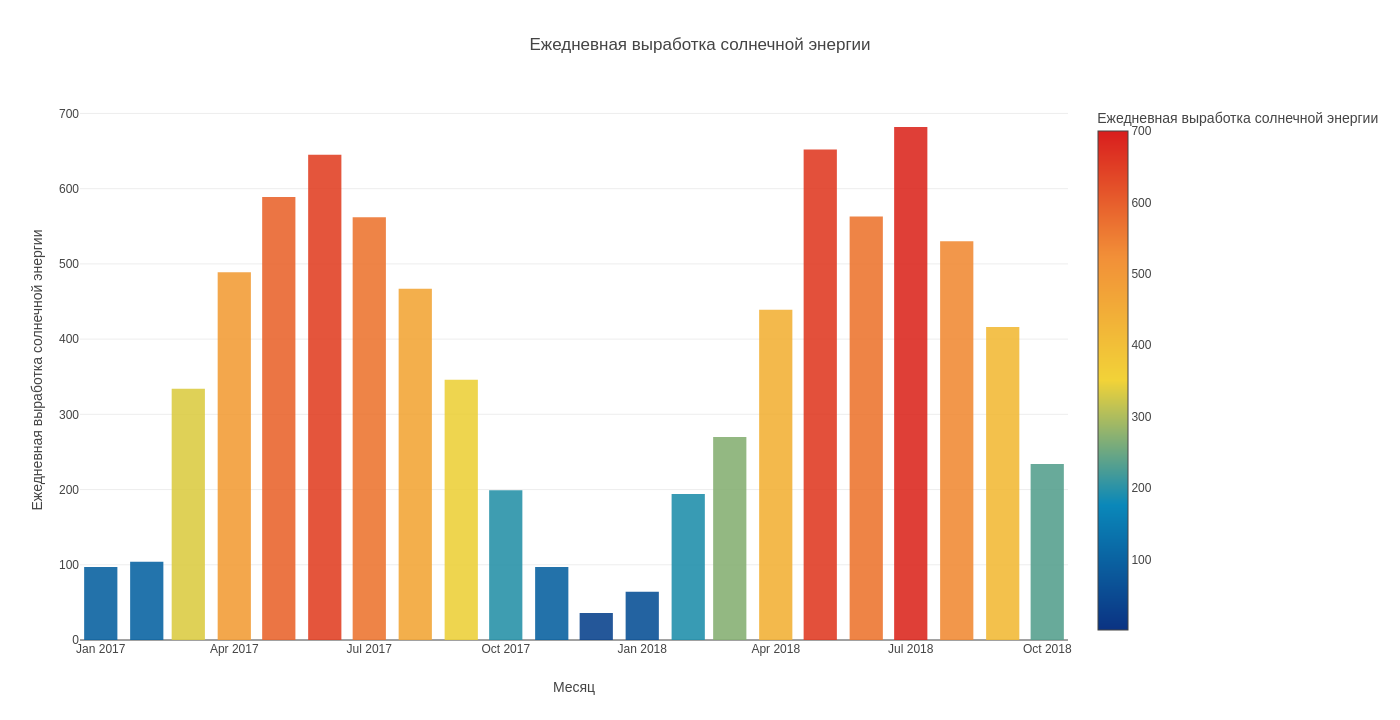

In [19]:
month_generation['month'] = month_generation['month'].astype('string')

barchart = px.bar(
data_frame=month_generation,
x='month',
y='day_power',
color='day_power',
opacity=0.9,
orientation="v",

barmode='overlay',
color_continuous_scale=px.colors.diverging.Portland,
range_color=[1,700], 

labels={"day_power":"Ежедневная выработка солнечной энергии", "month":"Месяц"},
title='Ежедневная выработка солнечной энергии',
width=1400,
height=720,
template='none'
)

barchart.show('png')

## Пики выработки солнечной энергии наблюдаются в летние месяцы ##